In [47]:
import importlib
import itertools 
import matplotlib.pyplot as plt
import numpy as np
import projet_madmc as pm

from tqdm import tqdm

In [3]:
%matplotlib notebook

In [4]:
importlib.reload(pm)

<module 'projet_madmc' from 'C:\\Users\\arian\\OneDrive\\Faculdade\\M2\\MADMC\\Projet\\git\\projet_madmc.py'>

## 2. Résultats préliminaires

In [16]:
n = 100
m = 100

vec = pm.gen_vecteur(n, m)
nd1 = pm.non_domine_naif(vec)
nd2 = pm.non_domine(vec)

<IPython.core.display.Javascript object>


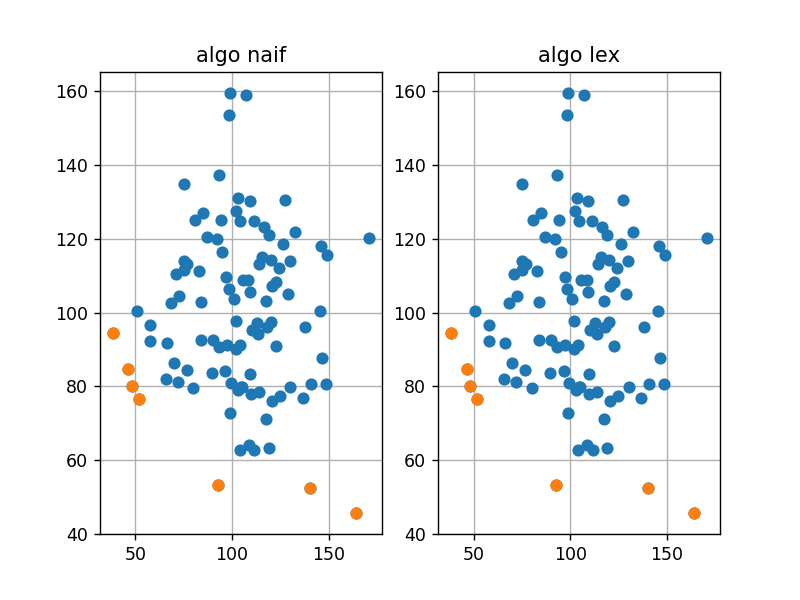

In [29]:
fig, ax = plt.subplots(1, 2)
for i in range(2):
    ax[i].grid(True)
    ax[i].set_axisbelow(True)
    ax[i].plot([w[0] for w in vec], [w[1] for w in vec], "o")
ax[0].set_title("algo naif")
ax[1].set_title("algo lex")
ax[0].plot([w[0] for w in nd1], [w[1] for w in nd1], "o")
ax[1].plot([w[0] for w in nd2], [w[1] for w in nd2], "o");

# Si vous voulez sauvegarder l'image au format pgf 
#fig.savefig("FigQ3Q4.pgf");

In [24]:
dict_nd1 = pm.tester_temps(pm.non_domine_naif)
dict_nd2 = pm.tester_temps(pm.non_domine)

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [00:21<00:00,  2.29it/s]


<IPython.core.display.Javascript object>


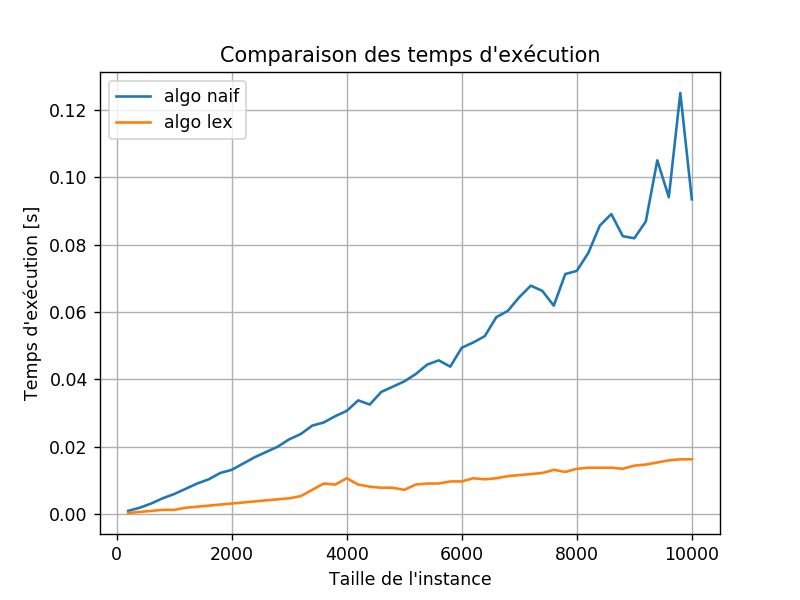

In [30]:
fig, ax = plt.subplots()
ax.grid(True)
ax.set_axisbelow(True)
ax.plot(list(dict_nd1.keys()), list(dict_nd1.values()), label="algo naif")
ax.plot(list(dict_nd2.keys()), list(dict_nd2.values()), label="algo lex")
ax.set_xlabel("Taille de l'instance")
ax.set_ylabel("Temps d'exécution [s]")
ax.set_title("Comparaison des temps d'exécution")
ax.legend();

# Si vous voulez sauvegarder l'image au format pgf 
#fig.savefig("FigQ5.pgf");

## 3. Une première procédure de résolution

In [25]:
n = 10
m = 30
I = (1/3, 2/3)
k = 3

vec = pm.gen_vecteur(n, m)

In [39]:
par = pm.pareto_dyn(vec, k)
minimax = pm.pareto_solver(vec, k, I)

In [40]:
points = [np.array(p).sum(0) for p in itertools.combinations(vec, k)]

<IPython.core.display.Javascript object>


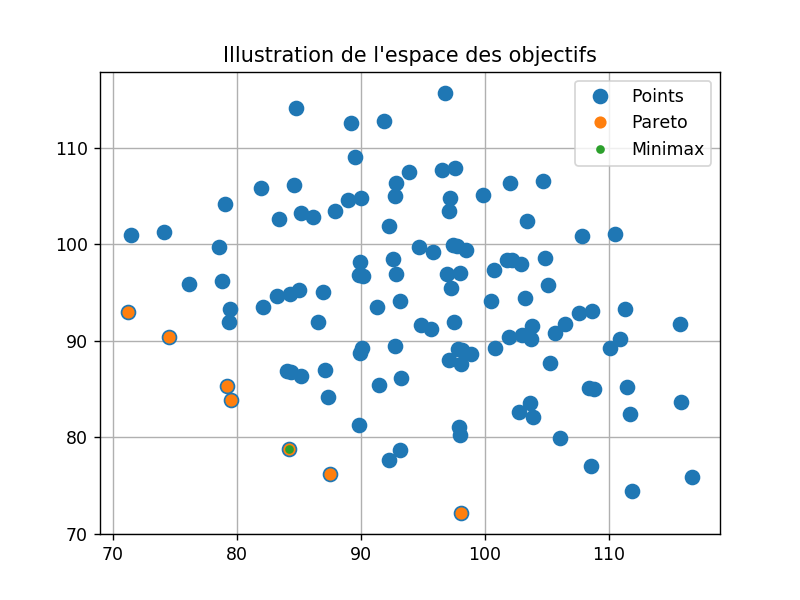

In [44]:
fig, ax = plt.subplots()
ax.grid(True)
ax.set_axisbelow(True)
ax.set_title("Illustration de l'espace des objectifs")
ax.plot([w[0] for w in points], [w[1] for w in points], "o", markersize = 8, label = "Points")
ax.plot([w[0] for w in par], [w[1] for w in par], "o", markersize = 6, label = "Pareto")
ax.plot([minimax[0]], [minimax[1]], "o", markersize = 4, label = "Minimax");
ax.legend();
# Si vous voulez sauvegarder l'image au format pgf 
#fig.savefig("FigQ9.pgf");

## 4. Une seconde procédure de résolution

In [42]:
pi = np.array([[I[0], 1 - I[0]], [I[1], 1 - I[1]]])
pi_in = np.linalg.inv(pi)

vec_i = [tuple(pi.dot(y)) for y in vec]  
i_nd = pm.pareto_dyn(vec_i, k)
i_nd = [tuple(pi_in.dot(w)) for w in i_nd]

minimax = pm.i_solver(vec, k, I)

<IPython.core.display.Javascript object>


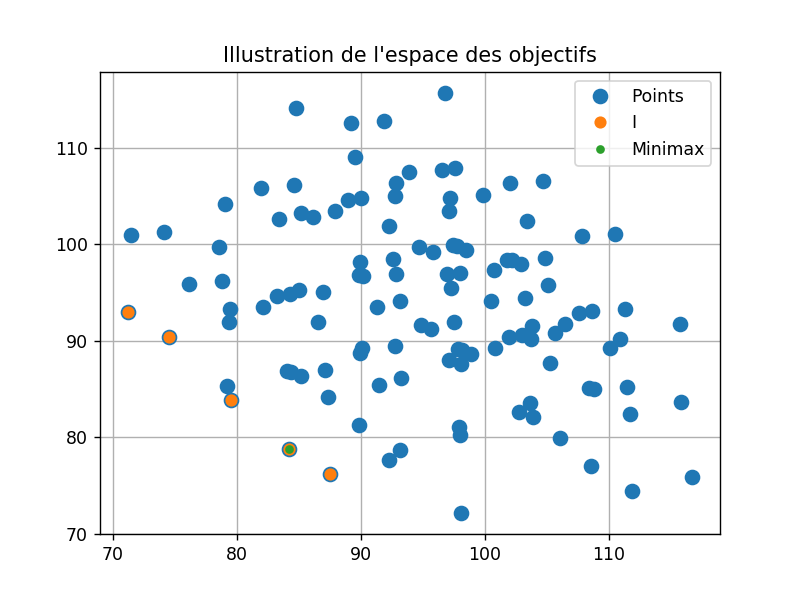

In [45]:
fig, ax = plt.subplots()
ax.grid(True)
ax.set_axisbelow(True)
ax.set_title("Illustration de l'espace des objectifs")
ax.plot([w[0] for w in points], [w[1] for w in points], "o", markersize = 8, label = "Points")
ax.plot([w[0] for w in i_nd], [w[1] for w in i_nd], "o", markersize = 6, label = "I")
ax.plot([minimax[0]], [minimax[1]], "o", markersize = 4, label = "Minimax");
ax.legend();
# Si vous voulez sauvegarder l'image au format pgf 
#fig.savefig("FigQ11.pgf");

On vérifie que `pareto_solver` et `i_solver` retournent bien le même résultat :

In [49]:
for _ in tqdm(range(1000)):
    x = pm.gen_vecteur(100, 100)
    I = (np.random.uniform(0, 0.5), np.random.uniform(0.5, 1))
    y1 = pm.pareto_solver(x, 20, I)
    y2 = pm.i_solver(x, 20, I)
    assert abs(y1[0] - y2[0]) + abs(y1[1] - y2[1]) < 1e-5, "Erreur ! y1 = {}, y2 = {}".format(y1, y2)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:22<00:00, 12.11it/s]
